In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn
import math
import random

In [ ]:
transform = transforms.ToTensor()
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
testset = datasets.MNIST('',download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=500)
testloader = torch.utils.data.DataLoader(testset,batch_size=500)

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
pcatrain=(trainset.data).reshape(60000,784)
pcatest=testset.data.reshape(10000,784)

In [ ]:
def PCA(input, k):
 imean = torch.mean(input.float(),0)
 input = input - imean.expand_as(input)
 U,S,V = torch.svd(torch.mm(input,torch.t(input)))
 return torch.mm(input,U[:,:k]),U[:,:k]

In [ ]:
U=PCA(pcatrain,50)

In [ ]:
plt.imshow(torch.mm(output,recons.t())[5].reshape(28,28),cmap='gray')

In [ ]:
class AE1(nn.Module):
  def __init__(self):
    super(AE1, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(784,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,30),
        nn.ReLU())
    self.decoder =nn.Sequential(
        nn.Linear(30,128),
        nn.ReLU(),
        nn.Linear(128,256),
        nn.ReLU(),
        nn.Linear(256,784),
        nn.ReLU())
    
  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    return x    

In [ ]:
LearningRate=0.0003
epochs=10

In [ ]:
model1=AE1()
criterion1 = nn.MSELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=LearningRate)

trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
    images=images.reshape(500,784)
    outputs = model1(images.float())
    loss = criterion1(outputs, images)
    trainingloss_list.append(loss.item())
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')




Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


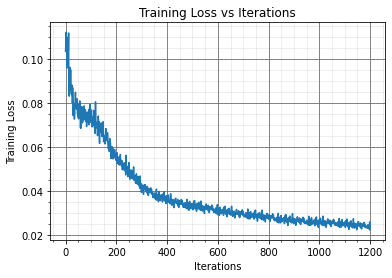

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.show()

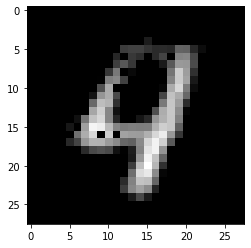

In [ ]:
plt.imshow(outputs.detach().numpy()[1].reshape(28,28),cmap='gray')

In [ ]:
class AE2(nn.Module):
  def __init__(self,hidsize):
    super(AE2, self).__init__()
    self.hidsize=hidsize
    self.encoder = nn.Sequential(
        nn.Linear(784,hidsize),
        nn.ReLU())
    self.decoder =nn.Sequential(
        nn.Linear(hidsize,784),
        nn.ReLU())
    
  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    return x    

In [ ]:
LearningRate=0.003
epochs=10

In [ ]:
model2=AE2(64)
criterion = nn.MSELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=LearningRate)

trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
    images=images.reshape(500,784)
    outputs = model2(images.float())
    loss = criterion(outputs, images)
    trainingloss_list.append(loss.item())
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


In [ ]:
model3=AE2(128)
criterion = nn.MSELoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=LearningRate)
trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
    images=images.reshape(500,784)
    outputs = model3(images.float())
    loss = criterion(outputs, images)
    trainingloss_list.append(loss.item())
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


In [ ]:
model4=AE2(256)
criterion = nn.MSELoss()
optimizer4 = torch.optim.Adam(model4.parameters(), lr=LearningRate)

trainingloss_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
    images=images.reshape(500,784)
    outputs = model4(images.float())
    loss = criterion(outputs, images)
    trainingloss_list.append(loss.item())
    optimizer4.zero_grad()
    loss.backward()
    optimizer4.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


In [ ]:
imageset=np.zeros((10,28,28))
imageset=torch.from_numpy(imageset)
imageset=imageset.float()
complabel=0
while(complabel<10):
  for images,labels in testloader:
    for i in range(labels.size(0)):
      if(labels[i]==complabel):
        imageset[complabel]=images[i].clone()
        complabel+=1

<Figure size 432x288 with 0 Axes>

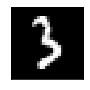

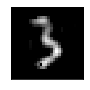

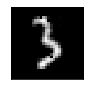

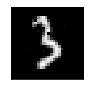

In [ ]:
output1=model2(imageset[3].reshape(1,784).float())
output2=model3(imageset[3].reshape(1,784).float())
output3=model4(imageset[3].reshape(1,784).float())
plt.figure(1)
fig,ax = plt.subplots()
ax=plt.subplot(1,4,1)
ax.set_xticks([])
ax.set_yticks([])
im=ax.imshow(imageset[3],cmap='gray')
fig,ax = plt.subplots()
ax=plt.subplot(1,4,2)
ax.set_xticks([])
ax.set_yticks([])
im=ax.imshow(output1.detach().numpy()[0].reshape(28,28),cmap='gray')
fig,ax = plt.subplots()
ax=plt.subplot(1,4,3)
ax.set_xticks([])
ax.set_yticks([])
im=ax.imshow(output2.detach().numpy()[0].reshape(28,28),cmap='gray')
fig,ax = plt.subplots()
ax=plt.subplot(1,4,4)
ax.set_xticks([])
ax.set_yticks([])
im=ax.imshow(output3.detach().numpy()[0].reshape(28,28),cmap='gray')
plt.show()

<Figure size 432x288 with 0 Axes>

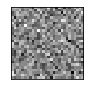

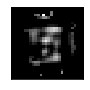

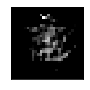

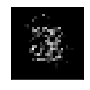

In [ ]:
Xnp=np.random.normal(0.5,0.05,(1,28,28))
X=torch.from_numpy(Xnp)
output1=model2(X.reshape(1,784).float())
output2=model3(X.reshape(1,784).float())
output3=model4(X.reshape(1,784).float())
plt.figure(1)
fig,ax = plt.subplots()
ax=plt.subplot(1,4,1)
ax.set_xticks([])
ax.set_yticks([])
im=ax.imshow(X.detach().numpy()[0],cmap='gray')
fig,ax = plt.subplots()
ax=plt.subplot(1,4,2)
ax.set_xticks([])
ax.set_yticks([])
im=ax.imshow(output1.detach().numpy()[0].reshape(28,28),cmap='gray')
fig,ax = plt.subplots()
ax=plt.subplot(1,4,3)
ax.set_xticks([])
ax.set_yticks([])
im=ax.imshow(output2.detach().numpy()[0].reshape(28,28),cmap='gray')
fig,ax = plt.subplots()
ax=plt.subplot(1,4,4)
ax.set_xticks([])
ax.set_yticks([])
im=ax.imshow(output3.detach().numpy()[0].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
class AE3(nn.Module):
  def __init__(self):
    super(AE3, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(784,1225),
        nn.ReLU())
    self.decoder =nn.Sequential(
        nn.Linear(1225,784),
        nn.ReLU())
    
  def forward(self,x):
    x=self.encoder(x)
    l1loss=torch.norm(x,p=1)
    x=self.decoder(x)
    return x,l1loss   

In [ ]:
LearningRate=0.0003
lam = 1e-7
epochs=10

In [ ]:
model5=AE3()
criterion = nn.MSELoss()
optimizer5 = torch.optim.Adam(model5.parameters(), lr=LearningRate)

trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
    images=images.reshape(500,784)
    outputs,loss1 = model5(images.float())
    loss = criterion(outputs, images)+lam*loss1
    trainingloss_list.append(loss.item())
    optimizer5.zero_grad()
    loss.backward()
    optimizer5.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


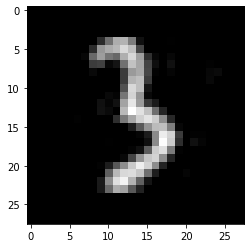

In [ ]:
output,loss=model5(imageset[3].reshape(1,784))
plt.imshow(output.detach().numpy()[0].reshape(28,28),cmap='gray') 

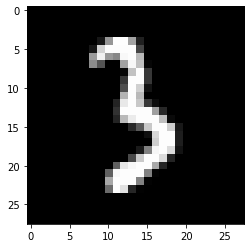

In [ ]:
plt.imshow(imageset[3],cmap='gray')

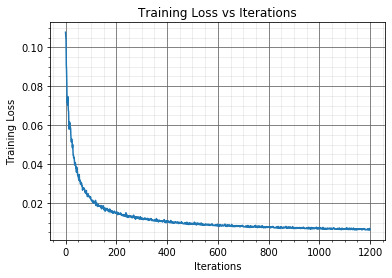

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.show()

In [ ]:
print("Average hidden layer activations for random 10 images")
sum=0
for i in range(10):
  avg=torch.norm(model4.encoder(imageset[i].reshape(1,784)),p=1)/256.0
  print(avg.detach().numpy())
  sum+=avg.detach().numpy()
print("Average of these values",sum/10.0)

Average hidden layer activations for random 10 images
0.76390445
0.4375137
0.57095784
0.5317687
0.94948316
0.55869013
0.73974884
0.63013
0.6779204
0.39369753
Average of these values 0.6253814727067948


In [ ]:
print("Average hidden layer activations for random 10 images")
sum=0
for i in range(10):
  avg=torch.norm(model5.encoder(imageset[i].reshape(1,784)),p=1)/1225.0
  print(avg.detach().numpy())
  sum+=avg.detach().numpy()
print("Average of these values",sum/10.0)

Average hidden layer activations for random 10 images
0.04818451
0.026131386
0.058396757
0.044867776
0.05386451
0.046525903
0.06729507
0.05213213
0.053802554
0.038988117
Average of these values 0.04901887085288763


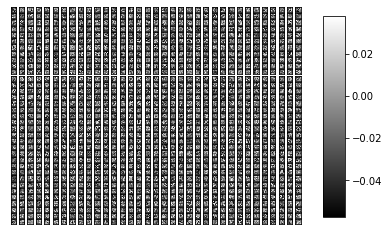

In [ ]:
ix=1
fig,ax=plt.subplots()
for i in range(len(model5.state_dict()['encoder.0.weight'])):
  ax=plt.subplot(35,35,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow(model5.state_dict()['encoder.0.weight'][i].reshape(28,28),cmap='gray')
  ix+=1
  
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

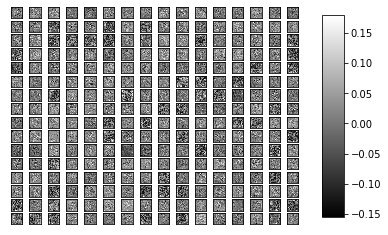

In [ ]:
ix=1
fig,ax=plt.subplots()
for i in range(len(model4.state_dict()['encoder.0.weight'])):
  ax=plt.subplot(16,16,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow(model4.state_dict()['encoder.0.weight'][i].reshape(28,28),cmap='gray')
  ix+=1
  
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [ ]:
output2==model4(X.reshape(1,784))
plt.imshow(output1.detach().numpy()[0].reshape(28,28),cmap='gray') 

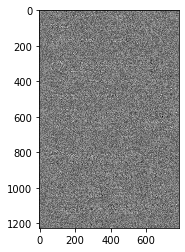

In [ ]:
plt.imshow(model5.state_dict()['encoder.0.weight'],cmap='gray')

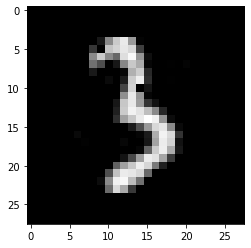

In [ ]:
a=random.sample(range(0,784),int(0.9*784))
X=imageset[3].clone()
X=X.reshape(1,784)
X[0][a]=0
output1=model4(imageset[3].reshape(1,784))
plt.imshow(output1.detach().numpy()[0].reshape(28,28),cmap='gray') 

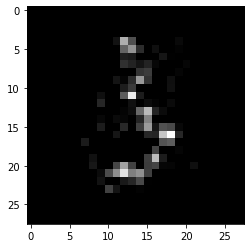

In [ ]:
output2=model4(X.reshape(1,784))
plt.imshow(output2.detach().numpy()[0].reshape(28,28),cmap='gray') 

In [ ]:
LearningRate=0.0003
epochs=10

In [ ]:
model6=AE3()
criterion = nn.MSELoss()
optimizer6 = torch.optim.Adam(model6.parameters(), lr=LearningRate)

trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
    a=random.sample(range(0,784),int(0.3*784))
    images=images.reshape(500,784)
    X=images.clone()
    X[:,a]=0
    outputs,loss1 = model6(X.float())
    loss = criterion(outputs, images)
    trainingloss_list.append(loss.item())
    optimizer6.zero_grad()
    loss.backward()
    optimizer6.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


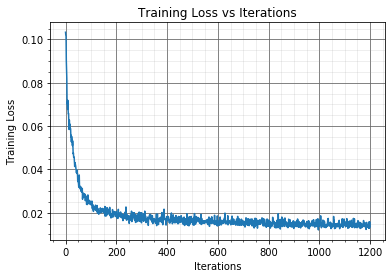

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.show()

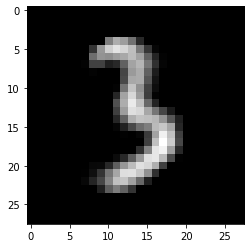

In [ ]:
a=random.sample(range(0,784),int(0.3*784))
X=imageset[3].clone()
X=X.reshape(1,784)
X[0][a]=0
output1,loss1=model6(imageset[3].reshape(1,784))
plt.imshow(output1.detach().numpy()[0].reshape(28,28),cmap='gray') 

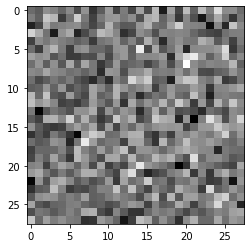

In [ ]:
x=imageset[1].clone()
x=x.reshape(1,784)
n=(torch.randn(1,784)*10)+torch.mean(x)
x=x+n
y=x.reshape(28,28)
plt.imshow(y,cmap='gray')

In [ ]:
class AE4(nn.Module):
  def __init__(self):
    super(AE4, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(784,64),
        nn.ReLU(),
        nn.Linear(64,8),
        nn.ReLU())
    self.decoder =nn.Sequential(
        nn.Linear(8,64),
        nn.ReLU(),
        nn.Linear(64,784),
        nn.ReLU())
    
  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    return x   

In [ ]:
LearningRate=0.0003
epochs=10

In [ ]:
model7=AE4()
criterion = nn.MSELoss()
optimizer7 = torch.optim.Adam(model7.parameters(), lr=LearningRate)
trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
    images=images.reshape(500,784)
    outputs = model7(images.float())
    loss = criterion(outputs, images)
    trainingloss_list.append(loss.item())
    optimizer7.zero_grad()
    loss.backward()
    optimizer7.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


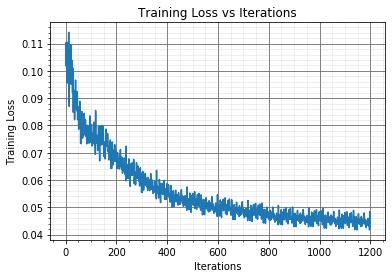

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.show()

Original Image is:


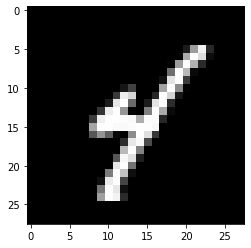

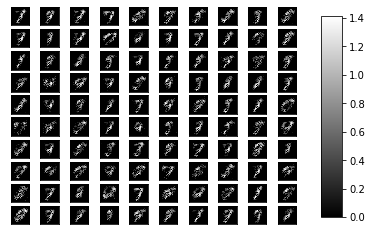

In [ ]:
print("Original Image is:")
inp=images[np.random.randint(0,500)]
plt.imshow(inp.reshape(28,28),cmap='gray')
ix=1
fig,ax=plt.subplots()
for i in range(100):
  rep=model7.encoder(inp.reshape(1,784))
  n=np.random.normal(0,1,(1,8))
  rep=rep+torch.from_numpy(n)
  out=model7.decoder(rep.float()).reshape(28,28)
  ax=plt.subplot(10,10,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow(out.detach().numpy(),cmap='gray')
  ix+=1
  
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [ ]:
class AE5(nn.Module):
  def __init__(self,y):
    super(AE5, self).__init__()
    self.y=y
    self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1)

    self.ssconv1 = nn.Conv2d(8, 1, kernel_size=3, stride=1, padding=1)
    self.ssconv2 = nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1)
    self.ssconv3 = nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1)

    self.pool = nn.MaxPool2d(kernel_size=2, stride=2,return_indices=True)
    
    self.deconv1 = nn.ConvTranspose2d(8,8,kernel_size=3,stride=1, padding=1)
    self.deconv2 = nn.ConvTranspose2d(16,16,kernel_size=3,stride=1, padding=1)
    self.deconv3 = nn.ConvTranspose2d(16,16,kernel_size=3,stride=1, padding=1)
    
    self.unpool = nn.MaxUnpool2d(2, stride=2)
    
    self.onlydeconv1 = nn.ConvTranspose2d(8,8,kernel_size=2,stride=2, padding=0)
    self.onlydeconv2 = nn.ConvTranspose2d(16,16,kernel_size=2,stride=2, padding=0)
    self.onlydeconv3 = nn.ConvTranspose2d(16,16,kernel_size=3,stride=2, padding=0)
    
    self.finconv = nn.Conv2d(1,1,kernel_size=3,stride=1,padding=1)
  
  def forward(self,x):
    
    x=self.conv1(x)
    s1=x.size()
    x,i1=self.pool(x)
    x=self.conv2(x)
    s2=x.size()
    x,i2=self.pool(x)
    x=self.conv3(x)
    s3=x.size()
    x,i3=self.pool(x)

    if(self.y==1):
      x=self.unpool(x,i3,s3)
      x=self.ssconv3(x)
      x=self.unpool(x,i2,s2)
      x=self.ssconv2(x)
      x=self.unpool(x,i1,s1)
      x=self.ssconv1(x)
      x=self.finconv(x)

    elif(self.y==2):
      x=self.unpool(x,i3,s3)
      x=self.deconv3(x)
      x=self.conv3(x)
      x=self.unpool(x,i2,s2)
      x=self.deconv2(x)
      x=self.conv2(x)
      x=self.unpool(x,i1,s1)
      x=self.deconv1(x)   
      x=self.conv1(x)
      x=self.finconv(x) 
    
    elif(self.y==3):
      x=self.onlydeconv3(x)
      x=self.conv3(x)
      x=self.onlydeconv2(x)
      x=self.conv2(x)
      x=self.onlydeconv1(x)   
      x=self.conv1(x)
    return x  

In [ ]:
LearningRate=0.01
epochs=10

In [ ]:
model8=AE5(1)
criterion = nn.MSELoss()
optimizer8 = torch.optim.Adam(model8.parameters(), lr=LearningRate)
trainingloss_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
    outputs = model8(images.float())
    loss = criterion(outputs, images)
    trainingloss_list.append(loss.item())
    optimizer8.zero_grad()
    loss.backward()
    optimizer8.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

Epoch 1 out of 10 epochs are over
Epoch 2 out of 10 epochs are over
Epoch 3 out of 10 epochs are over
Epoch 4 out of 10 epochs are over
Epoch 5 out of 10 epochs are over
Epoch 6 out of 10 epochs are over
Epoch 7 out of 10 epochs are over
Epoch 8 out of 10 epochs are over
Epoch 9 out of 10 epochs are over
Epoch 10 out of 10 epochs are over


In [ ]:
model9=AE5(2)
criterion = nn.MSELoss()
optimizer9 = torch.optim.Adam(model9.parameters(), lr=LearningRate)
trainingloss_list2 = []

for epoch in range(epochs):
  for images, labels in trainloader:
    outputs = model9(images.float())
    loss = criterion(outputs, images)
    trainingloss_list2.append(loss.item())
    optimizer9.zero_grad()
    loss.backward()
    optimizer9.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

RuntimeError: ignored

In [ ]:
model10=AE5(3)
criterion = nn.MSELoss()
optimizer10 = torch.optim.Adam(model10.parameters(), lr=LearningRate)
trainingloss_list3 = []

for epoch in range(epochs):
  for images, labels in trainloader:
    outputs = model10(images.float())
    loss = criterion(outputs, images)
    trainingloss_list3.append(loss.item())
    optimizer10.zero_grad()
    loss.backward()
    optimizer10.step()
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')

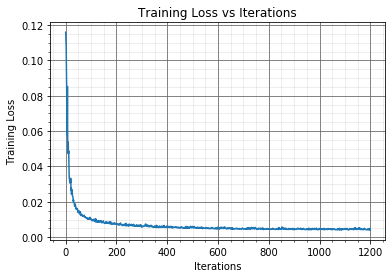

In [ ]:
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list,label="Unpooling")
plt.plot(xtrainloss,trainingloss_list,label="Unpooling+Deconv")
plt.plot(xtrainloss,trainingloss_list,label="Deconv")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.legend()
plt.show()

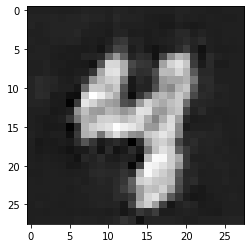

In [ ]:
output2=model8(imageset[4].reshape(1,1,28,28))
plt.imshow(output2.detach().numpy().reshape(28,28),cmap='gray') 